In [ ]:
import numpy as np
import pandas as pd
import math as Math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from mpl_toolkits.mplot3d import Axes3D #for 3D plot
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, Image
from numpy.random import seed
seed(seed=3116)

# **Exercise 0: Dataset Preprocessing**

1.   Dataset 1: Matrix 100x1 with Uniform distribution (1, 0.05) and target vector y= 1.3*x^2 + 4.8*x + 8 + v where v is randomly initialized 100x1 vector
2.   Dataset 2: Wine Quality Red Dataset




In [ ]:
#1. Regression Datasets preprocessing
mu = 1
sigma = 0.05
np.random.seed(2)
x = np.random.normal(mu, sigma, 100)
v_=np.random.rand(100,1)

In [ ]:
y=((1.3 *(np.square(x))) + (4.8 * x) + 8) + v_.T
D1=pd.DataFrame({'x':x, 'y':y.reshape(100,)},columns=['x','y']) 
D1

,x,y
0,0.979162,14.554806
1,0.997187,14.905441
2,0.893190,13.948001
3,1.082014,14.892356
4,0.910328,14.038140
...,...,...
95,1.052041,15.414787
96,1.019024,15.182361
97,0.989143,14.835832
98,1.058677,14.670077


In [ ]:
D2 = pd.read_csv('https://raw.githubusercontent.com/Can-Berk/Machine_Learning_Labs/main/Datasets/winequality-red.csv', engine='python', sep=";", decimal=".")

In [ ]:
print(D2.shape)
print(D2.dropna(how="any").shape)
print(D2.isnull().values.any())

(1599, 12)
(1599, 12)
False


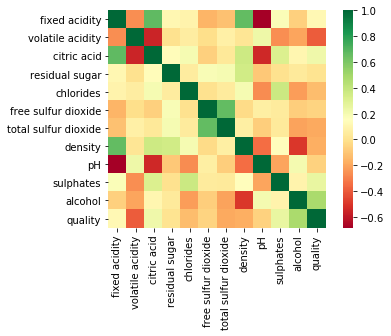

In [ ]:
# Correlation between variables is investigated
sns.heatmap(D2.corr(), square=True, cmap='RdYlGn')

In [ ]:
#X and Y matrix are constructed for regression
Y = D2['quality'].values.reshape(-1,1)
X = D2.drop('quality', axis=1).values


#Normalization of Ind. and Dep. Variables is made
Y = D2['quality'].values.reshape(-1,1)
X = D2.drop('quality', axis=1).values
standardize = StandardScaler()
standardize.fit(X)
X = standardize.transform(X)
standardize.fit(Y)
Y = standardize.transform(Y)

In [ ]:
print(X.shape)
print(Y.shape)

(1599, 11)
(1599, 1)


# **Exercise 1: Using Scikit Learn to experiment with following linear models and Stochastic Gradient Descent (SGD)**

*   Ordinary Least Squares
*   Ridge Regression
*   LASSO



In [ ]:
# Train- TEST 80-20%

In [ ]:
trainX, testX, trainY, testY = train_test_split(X,Y,random_state=0, test_size=0.2,stratify=Y)

In [ ]:
print(type(trainX), trainX.shape)
print(type(trainY), trainY.shape)

<class 'numpy.ndarray'> (1279, 11)
<class 'numpy.ndarray'> (1279, 1)


#### Training OLS for different learning rates

In [ ]:
#Learning-Rate: 10**-4
print("Learnning Rate=10**-4")
ols = SGDRegressor(learning_rate='constant', eta0=0.0001 ,penalty='none')
ols.fit(trainX,trainY)
pred_ytrain = ols.predict(trainX)
pred_ytest = ols.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("OLS Train data RMSE=", round(train_rmse,4))
print("OLS Test data RMSE=", round(test_rmse,4))

ols_rmse_list_train = np.array([train_rmse])
ols_rmse_list_test = np.array([test_rmse])

Learnning Rate=10**-4
OLS Train data RMSE= 0.8325
OLS Test data RMSE= 0.8363


In [ ]:
#Learning-Rate: 10**-3
print("Learnning Rate=10**-3")
ols = SGDRegressor(learning_rate='constant', eta0=0.001 ,penalty='none')
ols.fit(trainX,trainY)
pred_ytrain = ols.predict(trainX)
pred_ytest = ols.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("OLS Train data RMSE=", round(train_rmse,4))
print("OLS Test data RMSE=", round(test_rmse,4))

ols_rmse_list_train = np.append(ols_rmse_list_train, train_rmse)
ols_rmse_list_test = np.append(ols_rmse_list_test, test_rmse)

Learnning Rate=10**-3
OLS Train data RMSE= 0.7971
OLS Test data RMSE= 0.8207


In [ ]:
#Learning-Rate: 10**-2
print("Learnning Rate=10**-2")
ols = SGDRegressor(learning_rate='constant', eta0=0.01 ,penalty='none')
ols.fit(trainX,trainY)
pred_ytrain = ols.predict(trainX)
pred_ytest = ols.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("OLS Train data RMSE=", round(train_rmse,4))
print("OLS Test data RMSE=", round(test_rmse,4))

ols_rmse_list_train = np.append(ols_rmse_list_train, train_rmse)
ols_rmse_list_test = np.append(ols_rmse_list_test, test_rmse)
learning_rates=np.array([1e-4,1e-3,1e-2])

Learnning Rate=10**-2
OLS Train data RMSE= 0.8061
OLS Test data RMSE= 0.8481


In [ ]:
ols_df = pd.DataFrame({'learning_rate':learning_rates,'rmse_train':ols_rmse_list_train, 'rmse_test':ols_rmse_list_test})
print(ols_df)

   learning_rate  rmse_train  rmse_test
0         0.0001    0.832492   0.836278
1         0.0010    0.797080   0.820745
2         0.0100    0.806141   0.848105


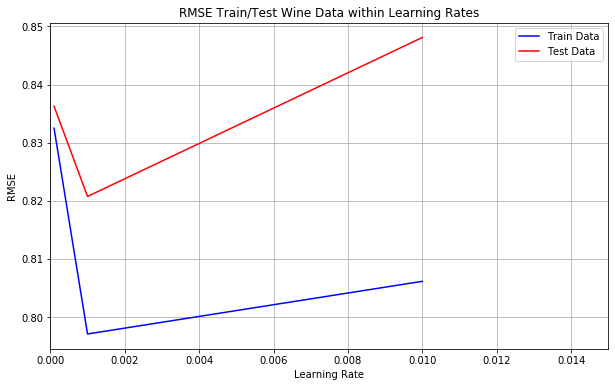

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ols_df.learning_rate,ols_df.rmse_train,'b', label='Train Data')
ax.plot(ols_df.learning_rate,ols_df.rmse_test,'r', label='Test Data')
plt.title('RMSE Train/Test Wine Data within Learning Rates')
ax.grid()
plt.xlabel('Learning Rate')
plt.ylabel('RMSE')
plt.xlim((0,0.015))
leg = ax.legend()
plt.show()

#### Training Ridge for learning rates 10**-4 & Penalties = (0.01 , 0.1 , 0.5)  #1

In [ ]:
#Learning-Rate = 10**-4 and penalty = 0.01
print("Learning-Rate = 10**-4 and penalty = 0.01")
ridge = SGDRegressor(learning_rate='constant', eta0=0.0001 ,alpha=0.01, penalty='l2')
ridge.fit(trainX,trainY)
pred_ytrain = ridge.predict(trainX)
pred_ytest = ridge.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("Ridge Train data RMSE=", round(train_rmse,4))
print("Ridge Test data RMSE=", round(test_rmse,4))

ridge1_rmse_list_train = np.array([train_rmse])
ridge1_rmse_list_test = np.array([test_rmse])

Learning-Rate = 10**-4 and penalty = 0.01
Ridge Train data RMSE= 0.8327
Ridge Test data RMSE= 0.8364


In [ ]:
#Learning-Rate = 10**-4 and penalty = 0.1
print("Learning-Rate = 10**-4 and penalty = 0.1")
ridge = SGDRegressor(learning_rate='constant', eta0=0.0001 ,alpha=0.1, penalty='l2')
ridge.fit(trainX,trainY)
pred_ytrain = ridge.predict(trainX)
pred_ytest = ridge.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("Ridge Train data RMSE=", round(train_rmse,4))
print("Ridge Test data RMSE=", round(test_rmse,4))

ridge1_rmse_list_train = np.append(ridge1_rmse_list_train, train_rmse)
ridge1_rmse_list_test = np.append(ridge1_rmse_list_test, test_rmse)

Learning-Rate = 10**-4 and penalty = 0.1
Ridge Train data RMSE= 0.8345
Ridge Test data RMSE= 0.8381


In [ ]:
#Learning-Rate = 10**-4 and penalty = 0.5
print("Learning-Rate = 10**-4 and penalty = 0.5")
ridge = SGDRegressor(learning_rate='constant', eta0=0.0001 ,alpha=0.5, penalty='l2')
ridge.fit(trainX,trainY)
pred_ytrain = ridge.predict(trainX)
pred_ytest = ridge.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("Ridge Train data RMSE=", round(train_rmse,4))
print("Ridge Test data RMSE=", round(test_rmse,4))

ridge1_rmse_list_train = np.append(ridge1_rmse_list_train, train_rmse)
ridge1_rmse_list_test = np.append(ridge1_rmse_list_test, test_rmse)
penalties=np.array([0.01,0.1,0.5])

Learning-Rate = 10**-4 and penalty = 0.5
Ridge Train data RMSE= 0.8451
Ridge Test data RMSE= 0.847


In [ ]:
ridge1_df = pd.DataFrame({'penalties':penalties,'rmse_train':ridge1_rmse_list_train, 'rmse_test':ridge1_rmse_list_test})
print(ridge1_df)

   penalties  rmse_train  rmse_test
0       0.01    0.832676   0.836412
1       0.10    0.834532   0.838087
2       0.50    0.845115   0.846980


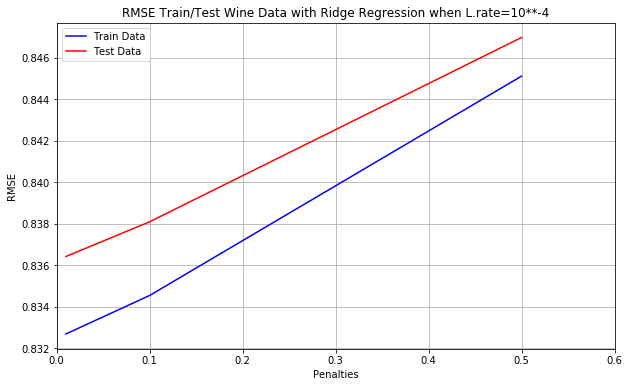

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ridge1_df.penalties,ridge1_df.rmse_train,'b', label='Train Data')
ax.plot(ridge1_df.penalties,ridge1_df.rmse_test,'r', label='Test Data')
ax.grid()
plt.title("RMSE Train/Test Wine Data with Ridge Regression when L.rate=10**-4")
plt.xlabel('Penalties')
plt.ylabel('RMSE')
plt.xlim((0,0.6))
leg = ax.legend()

#### Training Ridge for learning rates 10**-3 & Penalties = (0.01 , 0.1 , 0.5) #2

In [ ]:
#Learning-Rate = 10**-3 and penalty = 0.01
print("Learning-Rate = 10**-3 and penalty = 0.01")
ridge = SGDRegressor(learning_rate='constant', eta0=0.001 ,alpha=0.01, penalty='l2')
ridge.fit(trainX,trainY)
pred_ytrain = ridge.predict(trainX)
pred_ytest = ridge.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("Ridge Train data RMSE=", round(train_rmse,4))
print("Ridge Test data RMSE=", round(test_rmse,4))

ridge2_rmse_list_train = np.array([train_rmse])
ridge2_rmse_list_test = np.array([test_rmse])

Learning-Rate = 10**-3 and penalty = 0.01
Ridge Train data RMSE= 0.797
Ridge Test data RMSE= 0.8208


In [ ]:
#Learning-Rate = 10**-3 and penalty = 0.1
print("Learning-Rate = 10**-3 and penalty = 0.1")
ridge = SGDRegressor(learning_rate='constant', eta0=0.001 ,alpha=0.1, penalty='l2')
ridge.fit(trainX,trainY)
pred_ytrain = ridge.predict(trainX)
pred_ytest = ridge.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("Ridge Train data RMSE=", round(train_rmse,4))
print("Ridge Test data RMSE=", round(test_rmse,4))

ridge2_rmse_list_train = np.append(ridge2_rmse_list_train, train_rmse)
ridge2_rmse_list_test = np.append(ridge2_rmse_list_test, test_rmse)

Learning-Rate = 10**-3 and penalty = 0.1
Ridge Train data RMSE= 0.7993
Ridge Test data RMSE= 0.8179


In [ ]:
#Learning-Rate = 10**-3 and penalty = 0.5
print("Learning-Rate = 10**-3 and penalty = 0.5")
ridge = SGDRegressor(learning_rate='constant', eta0=0.001 ,alpha=0.5, penalty='l2')
ridge.fit(trainX,trainY)
pred_ytrain = ridge.predict(trainX)
pred_ytest = ridge.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("Ridge Train data RMSE=", round(train_rmse,4))
print("Ridge Test data RMSE=", round(test_rmse,4))

ridge2_rmse_list_train = np.append(ridge2_rmse_list_train, train_rmse)
ridge2_rmse_list_test = np.append(ridge2_rmse_list_test, test_rmse)
penalties=np.array([0.01,0.1,0.5])

Learning-Rate = 10**-3 and penalty = 0.5
Ridge Train data RMSE= 0.8161
Ridge Test data RMSE= 0.8264


In [ ]:
ridge2_df = pd.DataFrame({'penalties':penalties,'rmse_train':ridge2_rmse_list_train, 'rmse_test':ridge2_rmse_list_test})
print(ridge2_df)

   penalties  rmse_train  rmse_test
0       0.01    0.796973   0.820772
1       0.10    0.799313   0.817901
2       0.50    0.816142   0.826401


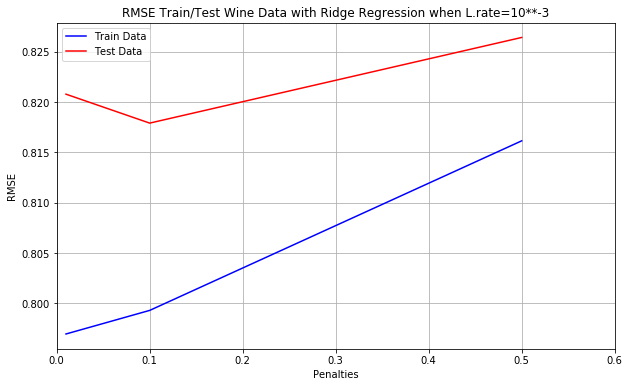

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ridge2_df.penalties,ridge2_df.rmse_train,'b', label='Train Data')
ax.plot(ridge2_df.penalties,ridge2_df.rmse_test,'r', label='Test Data')
plt.title("RMSE Train/Test Wine Data with Ridge Regression when L.rate=10**-3")
plt.xlabel('Penalties')
plt.ylabel('RMSE')
ax.grid()
plt.xlim((0,0.6))
leg = ax.legend()
plt.show()

#### Training Ridge for learning rates 10**-2 & Penalties = (0.01 , 0.1 , 0.5) #3

In [ ]:
#Learning-Rate = 10**-2 and penalty = 0.01
print("Learning-Rate = 10**-2 and penalty = 0.01")
ridge = SGDRegressor(learning_rate='constant', eta0=0.01 ,alpha=0.01, penalty='l2')
ridge.fit(trainX,trainY)
pred_ytrain = ridge.predict(trainX)
pred_ytest = ridge.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("Ridge Train data RMSE=", round(train_rmse,4))
print("Ridge Test data RMSE=", round(test_rmse,4))

ridge3_rmse_list_train = np.array([train_rmse])
ridge3_rmse_list_test = np.array([test_rmse])

Learning-Rate = 10**-2 and penalty = 0.01
Ridge Train data RMSE= 0.8162
Ridge Test data RMSE= 0.8515


In [ ]:
#Learning-Rate = 10**-2 and penalty = 0.1
print("Learning-Rate = 10**-2 and penalty = 0.1")
ridge = SGDRegressor(learning_rate='constant', eta0=0.01 ,alpha=0.1, penalty='l2')
ridge.fit(trainX,trainY)
pred_ytrain = ridge.predict(trainX)
pred_ytest = ridge.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("Ridge Train data RMSE=", round(train_rmse,4))
print("Ridge Test data RMSE=", round(test_rmse,4))

ridge3_rmse_list_train = np.append(ridge3_rmse_list_train, train_rmse)
ridge3_rmse_list_test = np.append(ridge3_rmse_list_test, test_rmse)

Learning-Rate = 10**-2 and penalty = 0.1
Ridge Train data RMSE= 0.8027
Ridge Test data RMSE= 0.8371


In [ ]:
#Learning-Rate = 10**-2 and penalty = 0.5
print("Learning-Rate = 10**-2 and penalty = 0.5")
ridge = SGDRegressor(learning_rate='constant', eta0=0.01 ,alpha=0.5, penalty='l2')
ridge.fit(trainX,trainY)
pred_ytrain = ridge.predict(trainX)
pred_ytest = ridge.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("Ridge Train data RMSE=", round(train_rmse,4))
print("Ridge Test data RMSE=", round(test_rmse,4))

ridge3_rmse_list_train = np.append(ridge3_rmse_list_train, train_rmse)
ridge3_rmse_list_test = np.append(ridge3_rmse_list_test, test_rmse)
penalties=np.array([0.01,0.1,0.5])

Learning-Rate = 10**-2 and penalty = 0.5
Ridge Train data RMSE= 0.9112
Ridge Test data RMSE= 0.8968


In [ ]:
ridge3_df = pd.DataFrame({'penalties':penalties,'rmse_train':ridge3_rmse_list_train, 'rmse_test':ridge3_rmse_list_test})
print(ridge3_df)

   penalties  rmse_train  rmse_test
0       0.01    0.816167   0.851496
1       0.10    0.802694   0.837068
2       0.50    0.911234   0.896770


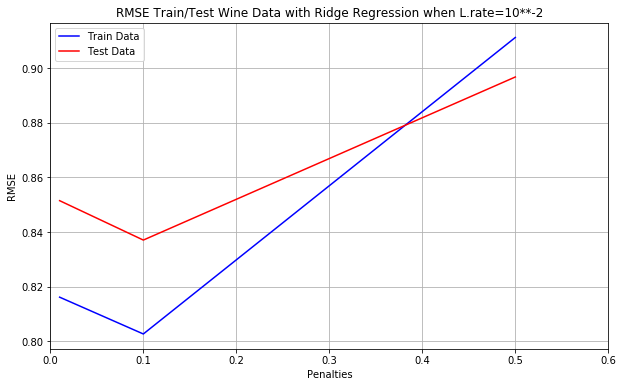

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ridge3_df.penalties,ridge3_df.rmse_train,'b', label='Train Data')
ax.plot(ridge3_df.penalties,ridge3_df.rmse_test,'r', label='Test Data')
plt.title("RMSE Train/Test Wine Data with Ridge Regression when L.rate=10**-2")
plt.xlabel('Penalties')
plt.ylabel('RMSE')
plt.xlim((0,0.6))
ax.grid()
leg = ax.legend()
plt.show()

#### Training Lasso for learning rates 10**-4 & Penalties = (0.01 , 0.1 , 0.5)  #1

In [ ]:
#Learning-Rate = 10**-4 and penalty = 0.01
print("Learning-Rate = 10**-4 and penalty = 0.01")
lasso = SGDRegressor(learning_rate='constant', eta0=0.0001 ,alpha=0.01, penalty='l1')
lasso.fit(trainX,trainY)
pred_ytrain = lasso.predict(trainX)
pred_ytest = lasso.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("Lasso Train data RMSE=", round(train_rmse,4))
print("Lasso Test data RMSE=", round(test_rmse,4))

ols1_rmse_list_train = np.array([train_rmse])
ols1_rmse_list_test = np.array([test_rmse])

Learning-Rate = 10**-4 and penalty = 0.01
Lasso Train data RMSE= 0.8359
Lasso Test data RMSE= 0.8377


In [ ]:
#Learning-Rate = 10**-4 and penalty = 0.1
print("Learning-Rate = 10**-4 and penalty = 0.1")
lasso = SGDRegressor(learning_rate='constant', eta0=0.0001 ,alpha=0.1, penalty='l1')
lasso.fit(trainX,trainY)
pred_ytrain = lasso.predict(trainX)
pred_ytest = lasso.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("Lasso Train data RMSE=", round(train_rmse,4))
print("Lasso Test data RMSE=", round(test_rmse,4))

ols1_rmse_list_train = np.append(ols1_rmse_list_train, train_rmse)
ols1_rmse_list_test = np.append(ols1_rmse_list_test, test_rmse)

Learning-Rate = 10**-4 and penalty = 0.1
Lasso Train data RMSE= 0.8754
Lasso Test data RMSE= 0.864


In [ ]:
#Learning-Rate = 10**-4 and penalty = 0.5
print("Learning-Rate = 10**-4 and penalty = 0.5")
lasso = SGDRegressor(learning_rate='constant', eta0=0.0001 ,alpha=0.5, penalty='l1')
lasso.fit(trainX,trainY)
pred_ytrain = lasso.predict(trainX)
pred_ytest = lasso.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("Lasso Train data RMSE=", round(train_rmse,4))
print("Lasso Test data RMSE=", round(test_rmse,4))

ols1_rmse_list_train = np.append(ols1_rmse_list_train, train_rmse)
ols1_rmse_list_test = np.append(ols1_rmse_list_test, test_rmse)
penalties=np.array([0.01,0.1,0.5])

Learning-Rate = 10**-4 and penalty = 0.5
Lasso Train data RMSE= 1.0012
Lasso Test data RMSE= 0.995


In [ ]:
ols1_df = pd.DataFrame({'penalties':penalties,'rmse_train':ols1_rmse_list_train, 'rmse_test':ols1_rmse_list_test})
print(ols1_df)

   penalties  rmse_train  rmse_test
0       0.01    0.835893   0.837715
1       0.10    0.875370   0.863969
2       0.50    1.001239   0.995033


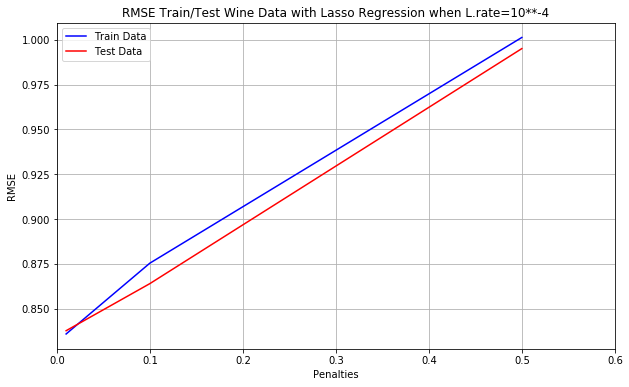

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ols1_df.penalties,ols1_df.rmse_train,'b', label='Train Data')
ax.plot(ols1_df.penalties,ols1_df.rmse_test,'r', label='Test Data')
plt.title("RMSE Train/Test Wine Data with Lasso Regression when L.rate=10**-4")
plt.xlabel('Penalties')
plt.ylabel('RMSE')
plt.xlim((0,0.6))
ax.grid()
leg = ax.legend()
plt.show()

#### Training Lasso for learning rates 10**-3 & Penalties = (0.01 , 0.1 , 0.5)  #2

In [ ]:
#Learning-Rate = 10**-3 and penalty = 0.01
print("Learning-Rate = 10**-3 and penalty = 0.01")
lasso = SGDRegressor(learning_rate='constant', eta0=0.001 ,alpha=0.01, penalty='l1')
lasso.fit(trainX,trainY)
pred_ytrain = lasso.predict(trainX)
pred_ytest = lasso.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("Lasso Train data RMSE=", round(train_rmse,4))
print("Lasso Test data RMSE=", round(test_rmse,4))

ols2_rmse_list_train = np.array([train_rmse])
ols2_rmse_list_test = np.array([test_rmse])

Learning-Rate = 10**-3 and penalty = 0.01
Lasso Train data RMSE= 0.7979
Lasso Test data RMSE= 0.8144


In [ ]:
#Learning-Rate = 10**-3 and penalty = 0.1
print("Learning-Rate = 10**-3 and penalty = 0.1")
lasso = SGDRegressor(learning_rate='constant', eta0=0.001 ,alpha=0.1, penalty='l1')
lasso.fit(trainX,trainY)
pred_ytrain = lasso.predict(trainX)
pred_ytest = lasso.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("Lasso Train data RMSE=", round(train_rmse,4))
print("Lasso Test data RMSE=", round(test_rmse,4))

ols2_rmse_list_train = np.append(ols2_rmse_list_train, train_rmse)
ols2_rmse_list_test = np.append(ols2_rmse_list_test, test_rmse)

Learning-Rate = 10**-3 and penalty = 0.1
Lasso Train data RMSE= 0.8296
Lasso Test data RMSE= 0.8102


In [ ]:
#Learning-Rate = 10**-3 and penalty = 0.5
print("Learning-Rate = 10**-3 and penalty = 0.5")
lasso = SGDRegressor(learning_rate='constant', eta0=0.001 ,alpha=0.5, penalty='l1')
lasso.fit(trainX,trainY)
pred_ytrain = lasso.predict(trainX)
pred_ytest = lasso.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("Lasso Train data RMSE=", round(train_rmse,4))
print("Lasso Test data RMSE=", round(test_rmse,4))

ols2_rmse_list_train = np.append(ols2_rmse_list_train, train_rmse)
ols2_rmse_list_test = np.append(ols2_rmse_list_test, test_rmse)
penalties=np.array([0.01,0.1,0.5])

Learning-Rate = 10**-3 and penalty = 0.5
Lasso Train data RMSE= 1.0013
Lasso Test data RMSE= 0.9952


In [ ]:
ols2_df = pd.DataFrame({'penalties':penalties,'rmse_train':ols2_rmse_list_train, 'rmse_test':ols2_rmse_list_test})
print(ols2_df)

   penalties  rmse_train  rmse_test
0       0.01    0.797874   0.814409
1       0.10    0.829551   0.810202
2       0.50    1.001336   0.995240


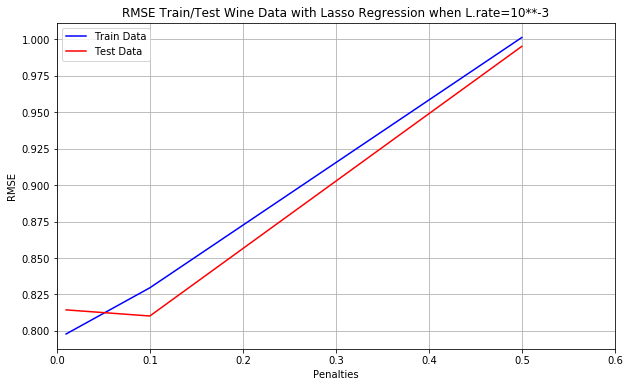

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ols2_df.penalties,ols2_df.rmse_train,'b', label='Train Data')
ax.plot(ols2_df.penalties,ols2_df.rmse_test,'r', label='Test Data')
plt.title("RMSE Train/Test Wine Data with Lasso Regression when L.rate=10**-3")
plt.xlabel('Penalties')
plt.ylabel('RMSE')
plt.xlim((0,0.6))
leg = ax.legend()
ax.grid()
plt.show()

#### Training Lasso for learning rates 10**-2 & Penalties = (0.01 , 0.1 , 0.5)  #3

In [ ]:
#Learning-Rate = 10**-2 and penalty = 0.01
print("Learning-Rate = 10**-2 and penalty = 0.01")
lasso = SGDRegressor(learning_rate='constant', eta0=0.01 ,alpha=0.01, penalty='l1')
lasso.fit(trainX,trainY)
pred_ytrain = lasso.predict(trainX)
pred_ytest = lasso.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("Lasso Train data RMSE=", round(train_rmse,4))
print("Lasso Test data RMSE=", round(test_rmse,4))

ols3_rmse_list_train = np.array([train_rmse])
ols3_rmse_list_test = np.array([test_rmse])

Learning-Rate = 10**-2 and penalty = 0.01
Lasso Train data RMSE= 0.8228
Lasso Test data RMSE= 0.8257


In [ ]:
#Learning-Rate = 10**-2 and penalty = 0.1
print("Learning-Rate = 10**-2 and penalty = 0.1")
lasso = SGDRegressor(learning_rate='constant', eta0=0.01 ,alpha=0.1, penalty='l1')
lasso.fit(trainX,trainY)
pred_ytrain = lasso.predict(trainX)
pred_ytest = lasso.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("Lasso Train data RMSE=", round(train_rmse,4))
print("Lasso Test data RMSE=", round(test_rmse,4))

ols3_rmse_list_train = np.append(ols3_rmse_list_train, train_rmse)
ols3_rmse_list_test = np.append(ols3_rmse_list_test, test_rmse)

Learning-Rate = 10**-2 and penalty = 0.1
Lasso Train data RMSE= 0.8421
Lasso Test data RMSE= 0.8122


In [ ]:
#Learning-Rate = 10**-2 and penalty = 0.5
print("Learning-Rate = 10**-2 and penalty = 0.5")
lasso = SGDRegressor(learning_rate='constant', eta0=0.01 ,alpha=0.5, penalty='l1')
lasso.fit(trainX,trainY)
pred_ytrain = lasso.predict(trainX)
pred_ytest = lasso.predict(testX)
train_rmse = np.sqrt(mean_squared_error(trainY,pred_ytrain))
test_rmse = np.sqrt(mean_squared_error(testY,pred_ytest))
print("Lasso Train data RMSE=", round(train_rmse,4))
print("Lasso Test data RMSE=", round(test_rmse,4))

ols3_rmse_list_train = np.append(ols3_rmse_list_train, train_rmse)
ols3_rmse_list_test = np.append(ols3_rmse_list_test, test_rmse)
penalties=np.array([0.01,0.1,0.5])

Learning-Rate = 10**-2 and penalty = 0.5
Lasso Train data RMSE= 1.0018
Lasso Test data RMSE= 0.9954


In [ ]:
ols3_df = pd.DataFrame({'penalties':penalties,'rmse_train':ols3_rmse_list_train, 'rmse_test':ols3_rmse_list_test})
print(ols3_df)

   penalties  rmse_train  rmse_test
0       0.01    0.822781   0.825718
1       0.10    0.842092   0.812195
2       0.50    1.001798   0.995353


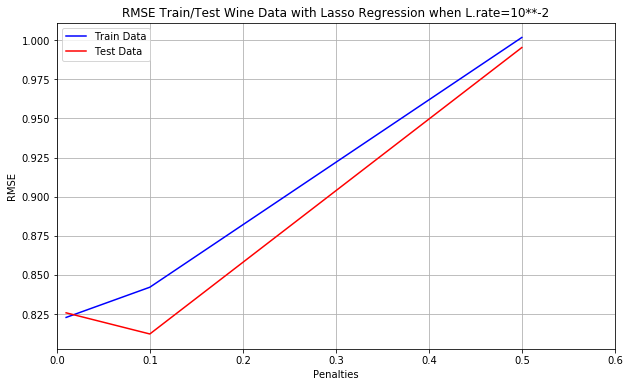

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ols3_df.penalties,ols3_df.rmse_train,'b', label='Train Data')
ax.plot(ols3_df.penalties,ols3_df.rmse_test,'r', label='Test Data')
plt.title("RMSE Train/Test Wine Data with Lasso Regression when L.rate=10**-2")
plt.xlabel('Penalties')
plt.ylabel('RMSE')
plt.xlim((0,0.6))
ax.grid()
leg = ax.legend()
plt.show()

In [ ]:
# RMSE on OLS seem to be decreased as learning rate increases up to a point, however, after that rmse again started to increase as there is no penalty term to avoid overfitting. Penalty term in Ridge and Lasso is used to avoid overfitting by pushing coefficient values. Usually increase in penalty term caused higher rmse (error) in both Ridge and Lasso regressions. Up to some point overfitting is avoided with Lasso and Ridge, but after that point rmse started increase again which indicates for underfitting (3. ridge graph). In general, Lasso rmse is significantly higher than Ridge for same penalty levels.

## **Grid Search**

#### Grid OLS

In [ ]:
parameters = { 'eta0' : [0.0001, 0.001, 0.01, 0.015]}
ols = SGDRegressor(learning_rate='constant', penalty='none')
ols_cv = GridSearchCV(ols,parameters,cv=5)
ols_cv.fit(trainX,trainY)
ols_cv_results = pd.DataFrame(ols_cv.cv_results_)

In [ ]:
print(ols_cv_results.head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_eta0  \
0       0.000798      0.000399         0.000200        0.000399     0.0001   
1       0.000599      0.000489         0.000399        0.000488      0.001   
2       0.000598      0.000489         0.000399        0.000489       0.01   
3       0.000598      0.000489         0.000199        0.000399      0.015   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'eta0': 0.0001}           0.304199           0.229933           0.292059   
1   {'eta0': 0.001}           0.381683           0.240477           0.374779   
2    {'eta0': 0.01}           0.366564           0.213354           0.349584   
3   {'eta0': 0.015}           0.347434           0.145874          -0.131830   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.277253  ...         0.277879        0.025538                3   
1           0.390461  ...         0.340867        

In [ ]:
a=ols_cv.best_params_
print(a)

{'eta0': 0.001}


In [ ]:
#best one is selected using R2
print("The Best R2 for OLS: ", round(np.max(ols_cv_results.mean_test_score),4), ols_cv.best_params_)

The Best R2 for OLS:  0.3409 {'eta0': 0.001}


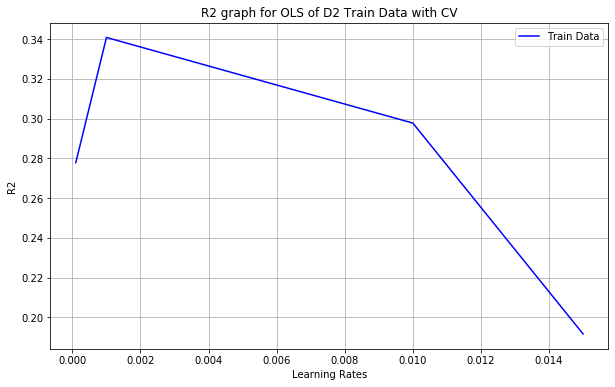

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ols_cv_results.param_eta0,ols_cv_results.mean_test_score,'b', label='Train Data')
plt.title('R2 graph for OLS of D2 Train Data with CV')
plt.xlabel('Learning Rates')
plt.ylabel('R2')
ax.grid()
leg = ax.legend()
plt.show()

In [ ]:
## CV

Learning Rate for Best Parameter= 0.001
CV results on best parameters: [0.29325248 0.21205023 0.31776634 0.31199622 0.2718518 ]
CV results mean on best parameters 0.28138


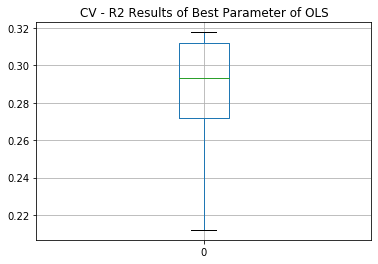

In [ ]:
print("Learning Rate for Best Parameter=", a.get('eta0'))
ols_best = SGDRegressor(learning_rate='constant', alpha=a.get('eta0') , penalty='none')
ols_cv_results_best_model = cross_val_score(ols_best,trainX, trainY, cv=5)
print("CV results on best parameters:",ols_cv_results_best_model)
print("CV results mean on best parameters",round(np.mean(ols_cv_results_best_model),5))

plt.figure()
pd.DataFrame(ols_cv_results_best_model).boxplot()
plt.title('CV - R2 Results of Best Parameter of OLS')
plt.show()

#### Grid Ridge

In [ ]:
parameters = {'eta0': np.arange(0.0001,0.0101,0.0001),'alpha':np.arange(0.01,0.5,0.05)}
ridge = SGDRegressor(learning_rate='constant', penalty='L2')
ridge_cv = GridSearchCV(ridge,parameters,cv=5)
ridge_cv.fit(trainX,trainY)
ridge_cv_results = pd.DataFrame(ridge_cv.cv_results_)

In [ ]:
print(ridge_cv_results.head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.000809      0.000405         0.000199        0.000398        0.01   
1       0.000591      0.000482         0.000399        0.000489        0.01   
2       0.000798      0.000399         0.000192        0.000384        0.01   
3       0.000407      0.000498         0.000596        0.000487        0.01   
4       0.000815      0.000408         0.000000        0.000000        0.01   

  param_eta0                                           params  \
0     0.0001                  {'alpha': 0.01, 'eta0': 0.0001}   
1     0.0002                  {'alpha': 0.01, 'eta0': 0.0002}   
2     0.0003  {'alpha': 0.01, 'eta0': 0.00030000000000000003}   
3     0.0004                  {'alpha': 0.01, 'eta0': 0.0004}   
4     0.0005                  {'alpha': 0.01, 'eta0': 0.0005}   

   split0_test_score  split1_test_score  split2_test_score  ...  \
0           0.303708           0.229579           0.292265  ...   


The Best R2 for Ridge Regression:  0.3467 {'alpha': 0.060000000000000005, 'eta0': 0.0022}


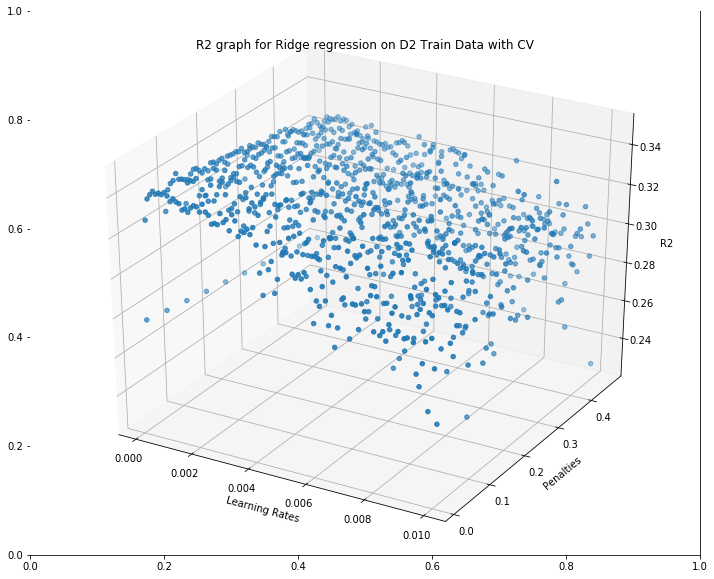

In [ ]:
#3D Plot Ridge Regression Hyperparameters - R2
print("The Best R2 for Ridge Regression: ",round(np.max(ridge_cv_results.mean_test_score),4), ridge_cv.best_params_)


fig, ax = plt.subplots(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ridge_cv_results.param_eta0,ridge_cv_results.param_alpha,ridge_cv_results.mean_test_score, label='Train Data')
plt.title('R2 graph for Ridge regression on D2 Train Data with CV')
ax.set_xlabel('Learning Rates')
ax.set_ylabel('Penalties')
ax.set_zlabel('R2')
plt.show()

In [ ]:
# CV

In [ ]:
b=ridge_cv.best_params_
print(b)

{'alpha': 0.060000000000000005, 'eta0': 0.0022}


Learning Rate for Best Parameter= 0.0022
Penalty for Best Parameter= 0.060000000000000005
CV results on best parameters: [0.37088795 0.22406058 0.37414808 0.3761458  0.32168587]
CV results mean on best parameters 0.33339


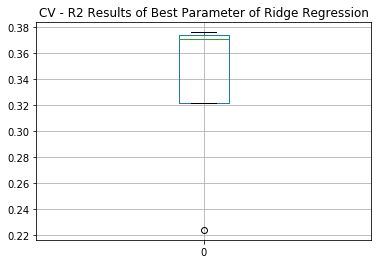

In [ ]:
print("Learning Rate for Best Parameter=",b.get('eta0'))
print("Penalty for Best Parameter=",b.get('alpha'))

sgd_best = SGDRegressor(learning_rate='constant',eta0=b.get('eta0'),alpha=b.get('alpha') , penalty='l2')
cv_results_best_model = cross_val_score(sgd_best,trainX, trainY, cv=5)
print("CV results on best parameters:",cv_results_best_model)
print("CV results mean on best parameters",round(np.mean(cv_results_best_model),5))


plt.figure()
pd.DataFrame(cv_results_best_model).boxplot()
plt.title('CV - R2 Results of Best Parameter of Ridge Regression')
plt.show()

#### Grid Lasso

In [ ]:
parameters = {'eta0': np.arange(0.0001,0.0051,0.0001),'alpha':np.arange(0.01,0.5,0.05)}
lasso = SGDRegressor(learning_rate='constant', penalty='L1')
lasso_cv = GridSearchCV(lasso,parameters,cv=5)
lasso_cv.fit(trainX,trainY)
lasso_cv_results = pd.DataFrame(lasso_cv.cv_results_)

In [ ]:
print(lasso_cv_results.head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.000805      0.000403         0.000399        0.000489        0.01   
1       0.001194      0.000398         0.000200        0.000399        0.01   
2       0.000776      0.000390         0.000000        0.000000        0.01   
3       0.000599      0.000489         0.000798        0.000399        0.01   
4       0.000595      0.000486         0.000599        0.000489        0.01   

  param_eta0                                           params  \
0     0.0001                  {'alpha': 0.01, 'eta0': 0.0001}   
1     0.0002                  {'alpha': 0.01, 'eta0': 0.0002}   
2     0.0003  {'alpha': 0.01, 'eta0': 0.00030000000000000003}   
3     0.0004                  {'alpha': 0.01, 'eta0': 0.0004}   
4     0.0005                  {'alpha': 0.01, 'eta0': 0.0005}   

   split0_test_score  split1_test_score  split2_test_score  ...  \
0           0.298065           0.226438           0.285646  ...   


The Best R2 for Lasso Regression:  0.3453 {'alpha': 0.01, 'eta0': 0.0031}


Text(0.5, 0, 'R2')

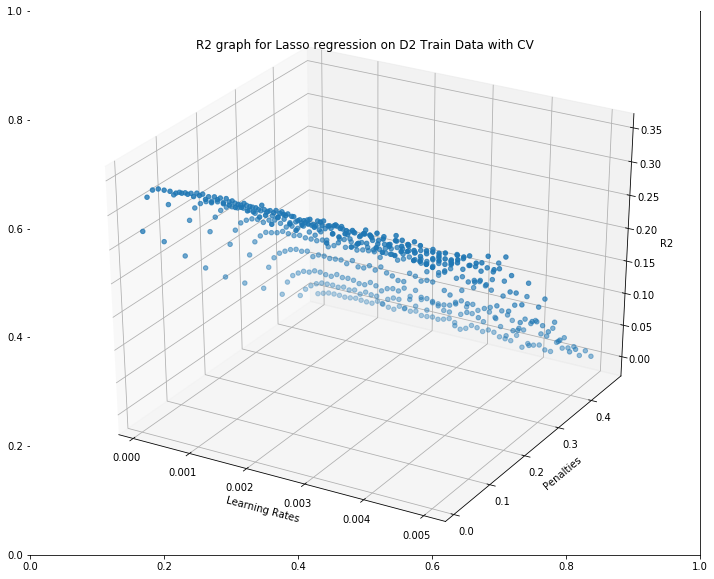

In [ ]:
#3D Plot Lasso Regression Hyperparameters - R2
print("The Best R2 for Lasso Regression: ",round(np.max(lasso_cv_results.mean_test_score),4),lasso_cv.best_params_)


fig, ax = plt.subplots(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lasso_cv_results.param_eta0,lasso_cv_results.param_alpha,lasso_cv_results.mean_test_score, label='Train Data')
plt.title('R2 graph for Lasso regression on D2 Train Data with CV')
ax.set_xlabel('Learning Rates')
ax.set_ylabel('Penalties')
ax.set_zlabel('R2')

In [ ]:
# CV

In [ ]:
c=lasso_cv.best_params_
print(c)

{'alpha': 0.01, 'eta0': 0.0031}


Learning Rate for Best Parameter= 0.0031
Penalty for Best Parameter=  0.01
CV results on best parameters: [0.35551344 0.2313223  0.36168063 0.39737169 0.29156031]
Mean of 5-Fold CV Results Best Parameters: 0.32749


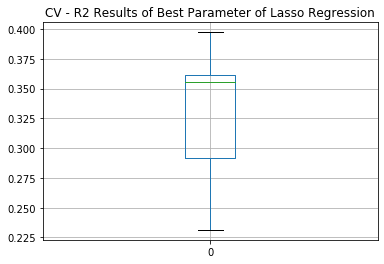

In [ ]:
## Cross_Validation
print("Learning Rate for Best Parameter=",c.get('eta0'))
print("Penalty for Best Parameter= ",c.get('alpha'))


sgd_best = SGDRegressor(learning_rate='constant',eta0=c.get('eta0'),alpha=c.get('alpha'), penalty='l2')
cv_results_best_model = cross_val_score(sgd_best,trainX, trainY, cv=5)
print("CV results on best parameters:",cv_results_best_model)
print("Mean of 5-Fold CV Results Best Parameters:",round(np.mean(cv_results_best_model),5))


plt.figure()
pd.DataFrame(cv_results_best_model).boxplot()
plt.title('CV - R2 Results of Best Parameter of Lasso Regression')
plt.show()

In [ ]:
#Best hyperparameters determined by average CV. Among them, R2 value is best for Ridge and also Lasso is very close while OLS has the lowest R2. Looking at the boxplots, we see similar pattern. After grid search R2 values are improved for Ridge and Lasso. Regularization also leads to avoid overfitting. 

# **Exercise 2: Higher Order Polynomial Regression**

## *Task A: Implement linear regression for each newly created dataset and plot their predicted curves*

### x=1,2,7,10,16,100

In [ ]:
x=D1.x.values
y=D1.y.values
x=x.reshape(-1,1)
y=y.reshape(-1,1)

Degree x=1
R2= 0.6329
rmse= 0.2877


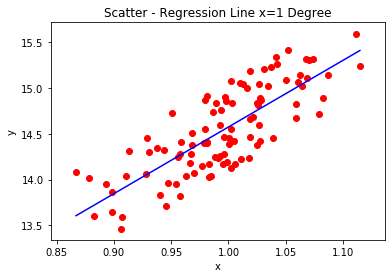

In [ ]:
print("Degree x=1")
p1 = PolynomialFeatures(1)        #x --> 1 degree
p1.fit_transform(x)

regr1 = LinearRegression()            #regression
regr1.fit(x, y)

pred_y = regr1.predict(x)             #prediction

print("R2=", round(regr1.score(x, y),4))
rmse = np.sqrt(mean_squared_error(y,pred_y))
print("rmse=", (round(rmse,4)))            #rmse with degree 1

x_line = np.linspace(min(x), max(x)).reshape(-1,1)
y_line = regr1.predict(x_line)


# Regression plot of degree x=1
plt.scatter(x,y,color='r')
plt.plot(x_line, y_line, color='b')
plt.title('Scatter - Regression Line x=1 Degree')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Degree x=2
R2= 0.6368
rmse= 0.2861


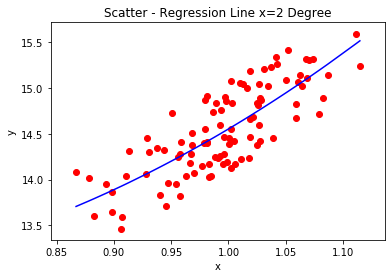

In [ ]:
print("Degree x=2")
p2 = PolynomialFeatures(2)
x2=p2.fit_transform(x)               #x --> 2 degree

regr2 = LinearRegression()               #regression
regr2.fit(x2, y)

pred_y = regr2.predict(x2)               #prediction

print("R2=", round(regr2.score(x2, y),4))
rmse = np.sqrt(mean_squared_error(y,pred_y))
print("rmse=", (round(rmse,4)))             #rmse with degree 2


# Regression plot of degree x=2
plt.scatter(x,y,color='r')
plt.plot(np.sort(x.reshape(1,-1)).reshape(-1,1),np.sort(pred_y.reshape(1,-1)).reshape(-1,1), color='b')
plt.title('Scatter - Regression Line x=2 Degree')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Degree x=7
R2= 0.6608
rmse= 0.2766


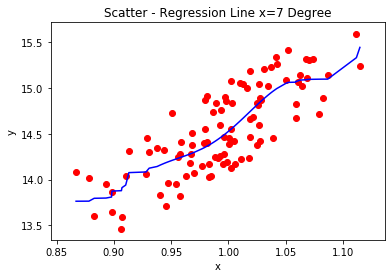

In [ ]:
print("Degree x=7")
p2 = PolynomialFeatures(7)
x7=p2.fit_transform(x)               #x --> 7 degree

regr7 = LinearRegression()               #regression
regr7.fit(x7, y)

pred_y = regr7.predict(x7)               #prediction

print("R2=", round(regr7.score(x7, y),4))
rmse = np.sqrt(mean_squared_error(y,pred_y))
print("rmse=", (round(rmse,4)))            #rmse with degree 7


# Regression plot of degree x=7
plt.scatter(x,y,color='r')
plt.plot(np.sort(x.reshape(1,-1)).reshape(-1,1),
np.sort(pred_y.reshape(1,-1)).reshape(-1,1), color='b')
plt.title('Scatter - Regression Line x=7 Degree')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Degree x=10
R2= 0.672
rmse= 0.2719


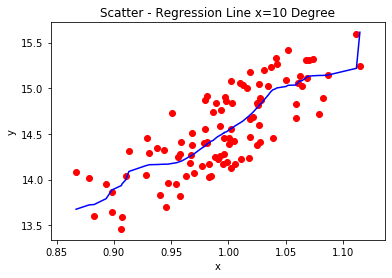

In [ ]:
print("Degree x=10")
p10 = PolynomialFeatures(10)
x10=p10.fit_transform(x)               #x --> 10 degree

regr10 = LinearRegression()               #regression
regr10.fit(x10, y)

pred_y = regr10.predict(x10)               #prediction

print("R2=", round(regr10.score(x10, y),4))
rmse = np.sqrt(mean_squared_error(y,pred_y))
print("rmse=", (round(rmse,4)))              #rmse with degree 10


# Regression plot of degree x=10
plt.scatter(x,y,color='r')
plt.plot(np.sort(x.reshape(1,-1)).reshape(-1,1),
np.sort(pred_y.reshape(1,-1)).reshape(-1,1), color='b')
plt.title('Scatter - Regression Line x=10 Degree')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Degree x=16
R2= 0.6736
rmse= 0.2713


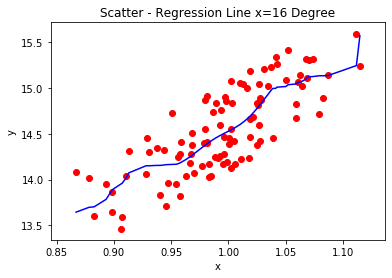

In [ ]:
print("Degree x=16")
p16 = PolynomialFeatures(16)
x16=p16.fit_transform(x)               #x --> 16 degree

regr16 = LinearRegression()               #regression
regr16.fit(x16, y)

pred_y = regr16.predict(x16)               #prediction

print("R2=", round(regr16.score(x16, y),4))
rmse = np.sqrt(mean_squared_error(y,pred_y))
print("rmse=", (round(rmse,4)))              #rmse with degree 16


# Regression plot of degree x=16
plt.scatter(x,y,color='r')
plt.plot(np.sort(x.reshape(1,-1)).reshape(-1,1),
np.sort(pred_y.reshape(1,-1)).reshape(-1,1), color='b')
plt.title('Scatter - Regression Line x=16 Degree')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Degree x=100
R2= 0.6957
rmse= 0.2619


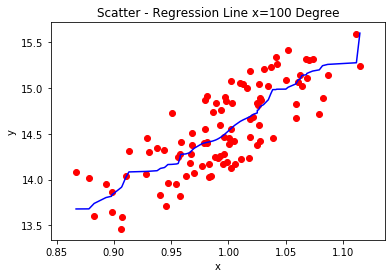

In [ ]:
print("Degree x=100")
p100 = PolynomialFeatures(100)
x100=p100.fit_transform(x)               #x --> 100 degree

regr100 = LinearRegression()               #regression
regr100.fit(x100, y)

pred_y = regr100.predict(x100)               #prediction

print("R2=", round(regr100.score(x100, y),4))
rmse = np.sqrt(mean_squared_error(y,pred_y))
print("rmse=", (round(rmse,4)))                 #rmse with degree 100


# Regression plot of degree x=100
plt.scatter(x,y,color='r')
plt.plot(np.sort(x.reshape(1,-1)).reshape(-1,1),
np.sort(pred_y.reshape(1,-1)).reshape(-1,1), color='b')
plt.title('Scatter - Regression Line x=100 Degree')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# At the beginnig with simple regression we see underfitting. Fitting line starts to overfit when polynomial degree is increased. To avoid that we need regularization in higher polynomial degrees. 

## *Task B: Analyze the effect of regularization by learning Ridge Regression for variety of values of regularization constant. Plot the predicted curves.*

In [ ]:
#λ=0, 10**−6, 10**−2, 1 while polynomial degree is set to 10

rmse= 0.2716


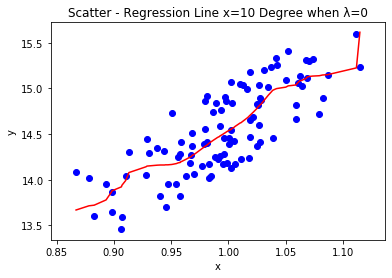

In [ ]:
ridge1 = Ridge(alpha=0, normalize=True)   #Ridge Regression λ=0
ridge1.fit(x10,y)                         #x --> 10 degree
ridge1.pred = ridge1.predict(x10)         #prediction

rmse = np.sqrt(mean_squared_error(y,ridge1.pred))
print("rmse=", (round(rmse,4)))  #rmse with polynomial degree 10 for ridge regression


plt.scatter(x,y,color='b')     #plot
plt.plot(np.sort(x.reshape(1,-1)).reshape(-1,1),np.sort(ridge1.pred.reshape(1,-1)).reshape(-1,1), color='r')
plt.title("Scatter - Regression Line x=10 Degree when λ=0")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

rmse= 0.2823


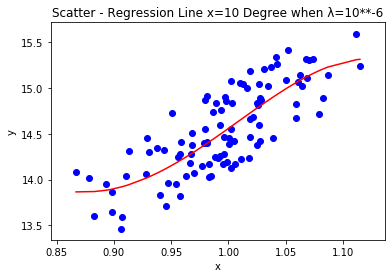

In [ ]:
ridge2 = Ridge(alpha=1e-06, normalize=True)   #Ridge Regression λ=10**−6
ridge2.fit(x10,y)                              #x --> 10 degree
ridge2.pred = ridge2.predict(x10)              #prediction

rmse = np.sqrt(mean_squared_error(y,ridge2.pred))
print("rmse=", (round(rmse,4)))  #rmse with polynomial degree 10 for ridge regression


plt.scatter(x,y,color='b')      #plot
plt.plot(np.sort(x.reshape(1,-1)).reshape(-1,1),np.sort(ridge2.pred.reshape(1,-1)).reshape(-1,1), color='r')
plt.title("Scatter - Regression Line x=10 Degree when λ=10**-6")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

rmse= 0.2861


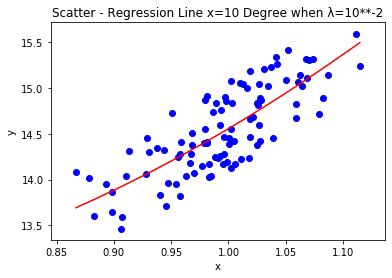

In [ ]:
ridge3 = Ridge(alpha=1e-02, normalize=True)   #Ridge Regression λ=10**−2
ridge3.fit(x10,y)                              #x --> 10 degree
ridge3.pred = ridge3.predict(x10)              #prediction

rmse = np.sqrt(mean_squared_error(y,ridge3.pred))
print("rmse=", (round(rmse,4)))  #rmse with polynomial degree 10 for ridge regression


plt.scatter(x,y,color='b')    #plot
plt.plot(np.sort(x.reshape(1,-1)).reshape(-1,1),np.sort(ridge3.pred.reshape(1,-1)).reshape(-1,1), color='r')
plt.title("Scatter - Regression Line x=10 Degree when λ=10**-2")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

rmse= 0.2904


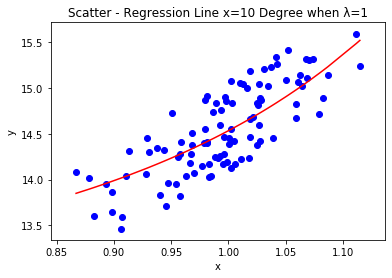

In [ ]:
ridge4 = Ridge(alpha=1, normalize=True)   #Ridge Regression λ=1
ridge4.fit(x10,y)                              #x --> 10 degree
ridge4.pred = ridge4.predict(x10)              #prediction

rmse = np.sqrt(mean_squared_error(y,ridge4.pred))
print("rmse=", (round(rmse,4)))  #rmse with polynomial degree 10 for ridge regression


plt.scatter(x,y,color='b')        #plot
plt.plot(np.sort(x.reshape(1,-1)).reshape(-1,1),np.sort(ridge4.pred.reshape(1,-1)).reshape(-1,1), color='r')
plt.title("Scatter - Regression Line x=10 Degree when λ=1")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#First graph with no regularization seem to overfit, however, using ridge regression with penalty term provide to make better predictions until it becomes underfitting the data. In order to find optimal penalty value grid search can be done.

# **Exercise 3: Implementing Coordinate Descent with/out Lasso Regression (L1 Regularization)**

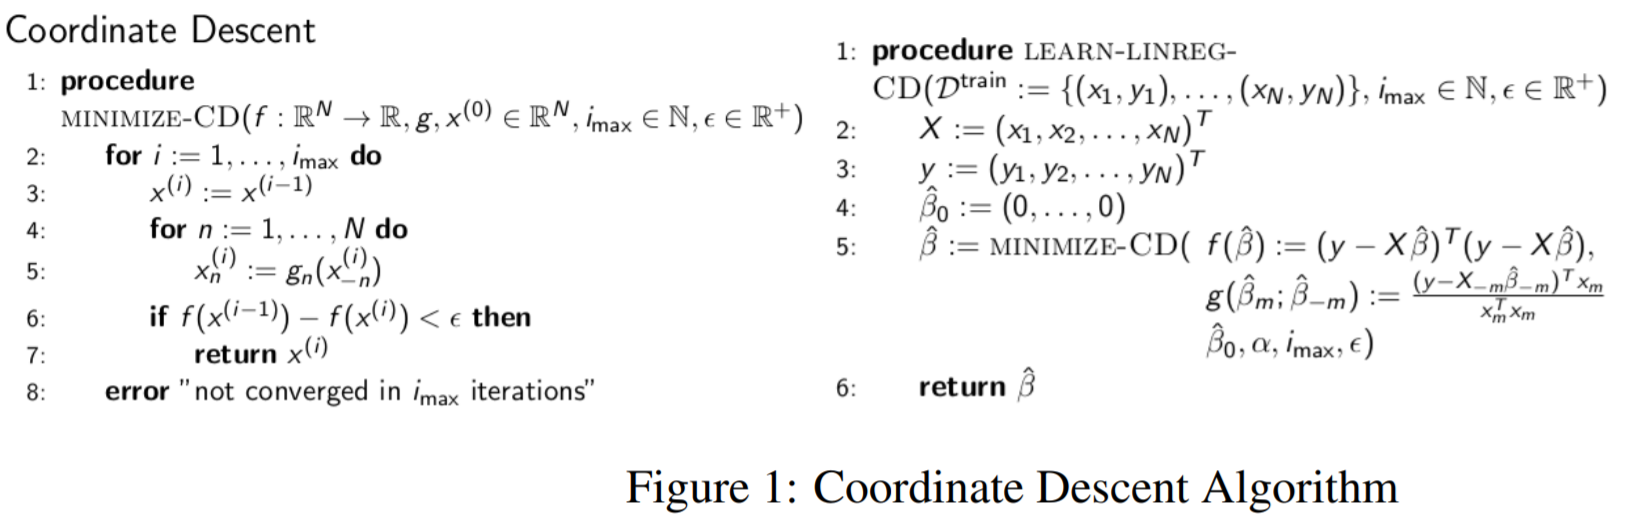

In [ ]:
Image(filename = "CD.PNG", width=750, height=300)

In [ ]:
m,n = trainX.shape
cdX=np.concatenate((trainX, np.ones(m).reshape(-1,1)), axis = 1)
trainY = trainY.flatten()
trainY = pd.Series(trainY)

In [ ]:
print(type(trainX),trainX.shape)
print(type(trainY),trainY.shape)
print(type(cdX),cdX.shape)

<class 'numpy.ndarray'> (1279, 11)
<class 'pandas.core.series.Series'> (1279,)
<class 'numpy.ndarray'> (1279, 12)


In [ ]:
def cd_linreg (X, Y, ite):
    B = np.zeros(np.size(X, 1))
    B = cd_min(X, Y, B, ite)
    return B


def cd_min(X, Y, B, ite):
    hist_B = np.zeros((np.size(X, 1), ite))   #init beta
    for i in range (ite):
        for j in range (np.size(X, 1)):
            X_a = np.delete(X, j, 1)
            B_a = np.delete(B, j)
            B[j] = np.dot((Y - np.dot(X_a, B_a)), X[:,j]) / (np.dot(X[:, j].T, X[:, j]))    #grad
            hist_B[j, i] = B[j]         #update beta
    return hist_B

In [ ]:
ite = 150
B = cd_linreg(cdX, trainY, ite)    #without regularization
B = np.insert(B, 0, np.zeros(len(B)), axis=1)   #zeros for first column
B = B.T

dfB = pd.DataFrame(B)
print('Beta in unregularized:', dfB.head())

Beta in unregularized:           0         1         2         3         4         5         6  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.158331 -0.336874 -0.046423  0.016284 -0.123219 -0.033427 -0.114759   
2  0.184462 -0.222932 -0.024233  0.104766 -0.136360  0.040322 -0.132309   
3  0.189937 -0.202345 -0.028948  0.090725 -0.130415  0.058409 -0.136981   
4  0.187800 -0.201253 -0.035210  0.082719 -0.128367  0.064549 -0.137403   

          7         8         9        10        11  
0  0.000000  0.000000  0.000000  0.000000  0.000000  
1 -0.224513 -0.049506  0.220335  0.253709  0.001797  
2 -0.204726 -0.045470  0.213590  0.279142  0.004177  
3 -0.187955 -0.051268  0.210437  0.296134  0.004412  
4 -0.174887 -0.056540  0.207665  0.305925  0.004449  


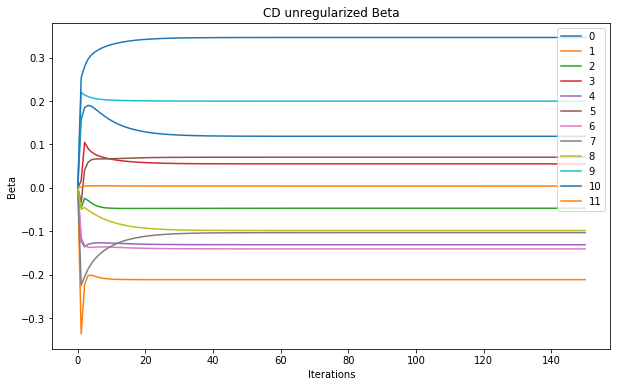

In [ ]:
dfB.plot(figsize=(10, 6))
plt.title('CD unregularized Beta')
plt.xlabel('Iterations')
plt.ylabel('Beta')
plt.legend(dfB.columns)
plt.show()

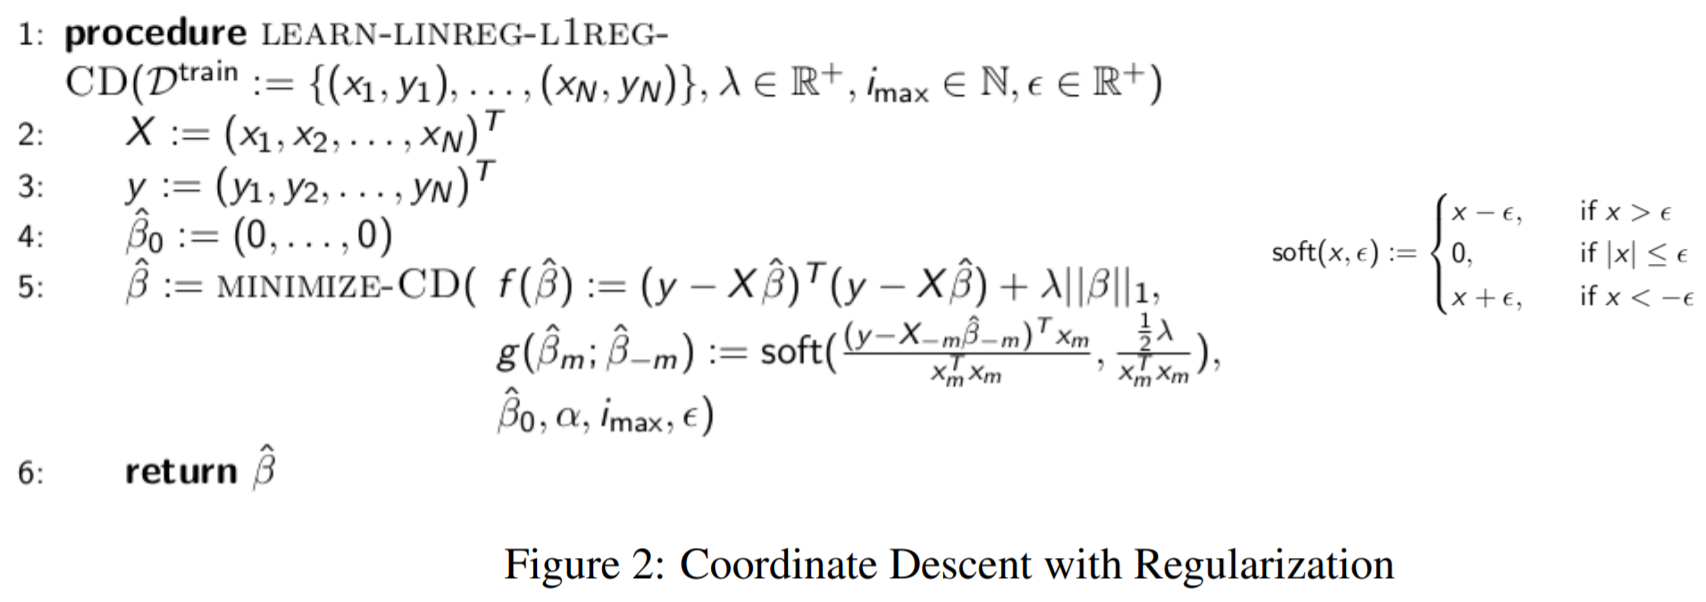

In [ ]:
Image(filename = "CD_L1.PNG", width=750, height=300)

In [ ]:
def cd_linreg_lasso (X, Y, ite, lval):
    B = np.zeros(np.size(X, 1))
    B = cd_min_lasso(X, Y, B, ite, lval)
    return B

def cd_min_lasso(X, Y, B, ite, lval):
    hist_B = np.zeros((np.size(X, 1), ite))      #init beta
    for i in range (ite):
        for j in range (np.size(X, 1)):
            X_a = np.delete(X, j, 1)
            B_a = np.delete(B, j)
            g = np.dot((Y - np.dot(X_a, B_a)), X[:,j]) / (np.dot(X[:,j].T, X[:, j]))   #grad
            t_hold = (1/2 * lval)/(np.dot(X[:, j].T, X[:, j]))

            #soft threshold
            if g > t_hold:
                B[j] = g-t_hold
                hist_B[j, i] = B[j]
            elif g > - t_hold and g < t_hold:
                B[j] = 0
                hist_B[j, i] = B[j]
            elif g < t_hold:
                B[j] = g+t_hold
                hist_B[j, i] = B[j]
    return hist_B

In [ ]:
ite = 150
lval = 10
B_lasso = cd_linreg_lasso(cdX, trainY, ite, lval)     #l1 regularization
B_lasso = np.insert(B_lasso, 0, np.zeros(len(B_lasso)), axis=1)      #zeros for first column
B_lasso = B_lasso.T

dfB_lasso = pd.DataFrame(B_lasso)
print('Beta in l1 regularized', dfB_lasso.head())

Beta in l1 regularized           0         1         2         3         4         5         6  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.154263 -0.334020 -0.038299  0.011450 -0.120741 -0.028632 -0.113928   
2  0.178797 -0.219323 -0.010477  0.097221 -0.132305  0.036575 -0.125894   
3  0.181413 -0.197945 -0.012121  0.082805 -0.125963  0.050686 -0.128168   
4  0.176262 -0.196353 -0.016803  0.074309 -0.123933  0.055071 -0.127698   

          7         8         9        10        11  
0  0.000000  0.000000  0.000000  0.000000  0.000000  
1 -0.219493 -0.042848  0.214836  0.251976  0.000000  
2 -0.198478 -0.036131  0.206970  0.277955  0.000000  
3 -0.179845 -0.041503  0.203300  0.295758  0.000070  
4 -0.164686 -0.047460  0.200265  0.306562  0.000061  


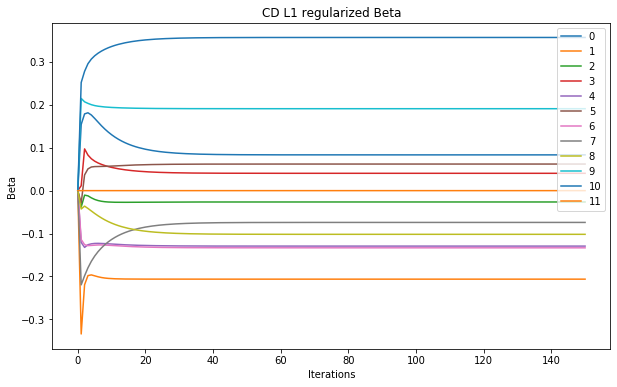

In [ ]:
dfB_lasso.plot(figsize=(10, 6))
plt.title('CD L1 regularized Beta')
plt.xlabel('Iterations')
plt.ylabel('Beta')
plt.legend(dfB_lasso.columns)
plt.show()

In [ ]:
#First graph shows Beta value updates in 150 iterations without regularization and second graph demonstrates it with regularization. There are 12 features and this means 12 Beta. Most seperated value for beta is observed in Beta0 value. On the second graph, L1 regulazation pushed some coefficients closer to 0.

# References

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
#https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html